In [10]:
!pip install scikit-fuzzy

In [11]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import warnings
warnings.filterwarnings('ignore')

In [12]:
funding = ctrl.Antecedent(np.arange(0, 101, 1), 'funding')
staffing = ctrl.Antecedent(np.arange(0, 101, 1), 'staffing')
risk = ctrl.Consequent(np.arange(0, 101, 1), 'risk')

funding['adequate'] = fuzz.trimf(funding.universe, [0, 0, 50])
funding['marginal'] = fuzz.trimf(funding.universe, [0, 50, 100])
funding['inadequate'] = fuzz.trimf(funding.universe, [50, 100, 100])

staffing['small'] = fuzz.trimf(staffing.universe, [0, 0, 100])
staffing['large'] = fuzz.trimf(staffing.universe, [0, 100, 100])

risk['low'] = fuzz.trimf(risk.universe, [0, 0, 50])
risk['normal'] = fuzz.trimf(risk.universe, [0, 50, 100])
risk['high'] = fuzz.trimf(risk.universe, [50, 100, 100])

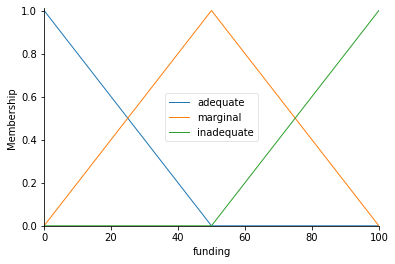

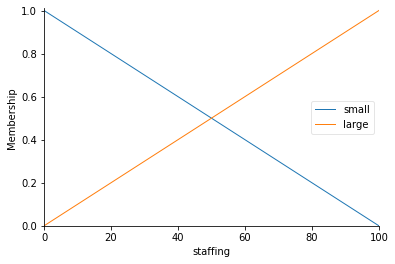

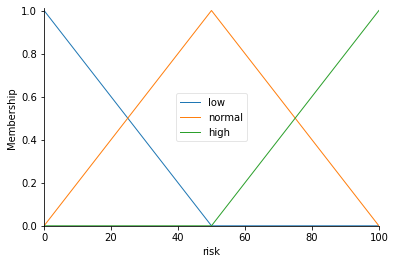

In [13]:
# You can see how these look with .view()
funding.view()
staffing.view()
risk.view()

In [14]:
rule1 = ctrl.Rule(funding['adequate'] | staffing['small'], risk['low']) 
rule2 = ctrl.Rule(funding['marginal'] & staffing['large'], risk['normal'])
rule3 = ctrl.Rule(funding['inadequate'], risk['high'])

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f0951a30240>)

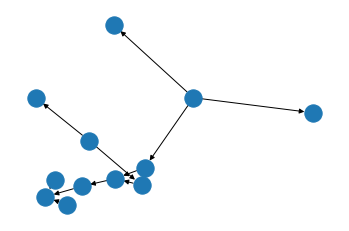

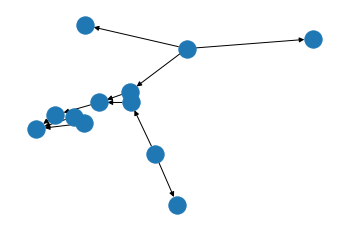

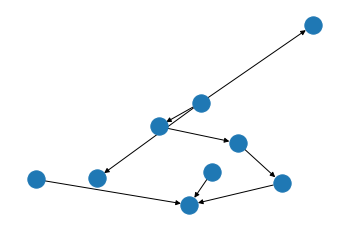

In [15]:
rule1.view()
rule2.view()
rule3.view()

In [16]:
tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)

In [17]:
tipping.input['funding'] = 35
tipping.input['staffing'] = 60

tipping.compute()

46.23188405797097


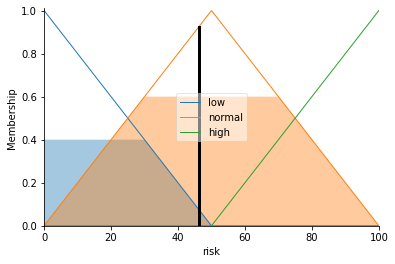

In [18]:
print(tipping.output['risk'])
risk.view(sim=tipping)